# Fetch raw data
MNSIT is an org that put out 70K pictures of handwritten numerical digits. It's understood in the ML community that saying MNIST refers to the dataset, because this is an industry-standard beginner's exercise, like the "Hello, World" of ML.

If we successfully download the images, the keys will look like:
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details','categories', 'url'])

In [8]:
from sklearn.datasets import fetch_openml # this is tool for fetching named datasets
mnist = fetch_openml('mnist_784', version=1) #need to download 15 megabytes of compressed images (55 mb) once, then scikit will cache it automatically
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [23]:
X = mnist["data"]
X.shape  # (70000, 784) because there's 70,000 images and 28x28 pixels = 784 features (data points)

(70000, 784)

In [29]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [30]:
y = mnist["target"]
y.shape  # (70000,)

(70000,)

In [31]:
y[99] #what's the 100th digit marked as?

'1'

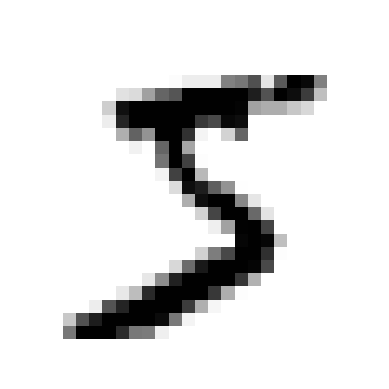

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()